# Recommender Systems

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [6]:
path = '/content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/'

In [7]:
df = pd.read_csv(path + 'u.data',sep='\t',names=column_names)

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [9]:
from pandas.io.parsers import read_csv
movie_titles = read_csv(path + 'Movie_Id_Titles')

In [11]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(df,movie_titles,on='item_id')

In [13]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [32]:
df.groupby('user_id').count()['rating'].sort_values(ascending=False)

user_id
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
34      20
418     20
166     20
0        3
Name: rating, Length: 944, dtype: int64

In [35]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [40]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


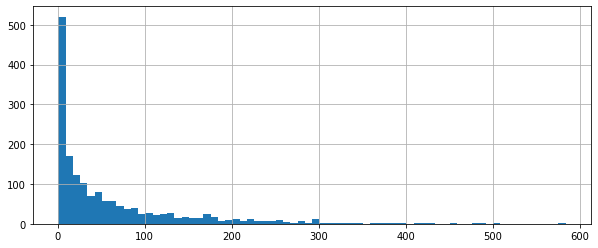

In [41]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

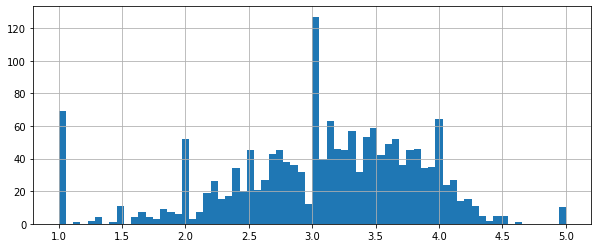

In [42]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

# Recommending movies